---
title: "Naïve Bayes"
format: html
execute:
    echo: true
code-fold: true
link-external-newwindow: true
bibliography: reference.bib
website:
  back-to-top-navigation: true
---


## Introduction

**Overview of Naive Bayes Classification:**

Naive Bayes classification is a popular machine learning algorithm used for various tasks, such as text classification, spam detection, and sentiment analysis. At its core, Naive Bayes is based on probability theory and Bayes' theorem. It's a simple yet effective method for categorizing data into predefined classes or categories.

**Probabilistic Nature and Bayes' Theorem Foundation:**

Naive Bayes is grounded in Bayes' theorem, which is a fundamental concept in probability theory. It uses conditional probability to make predictions. In essence, Naive Bayes calculates the probability that a data point belongs to a specific class based on the observed features or attributes associated with that data point.

The "naive" part of Naive Bayes comes from the assumption that the features used in the classification are conditionally independent, which means that the presence or absence of one feature does not affect the presence or absence of another feature. While this assumption simplifies the model, it may not always hold true in real-world scenarios.

**Objectives of Naive Bayes Classification:**

The primary objective of Naive Bayes classification is to assign a class label to a data point based on its features. This is often used for tasks like spam email detection, sentiment analysis, or categorizing documents.

**Achievements Through Naive Bayes Classification:**

Through Naive Bayes classification, we aim to achieve the following:

1. **Efficient Text Classification:** Naive Bayes is particularly effective for text classification tasks, such as classifying emails as spam or not spam.

2. **Quick and Simple Predictions:** Naive Bayes is computationally efficient and works well with high-dimensional data. It can make predictions quickly, making it suitable for real-time applications.

3. **Good Performance with Small Datasets:** Naive Bayes can perform well even when you have limited data, making it a valuable choice for scenarios with smaller datasets.

**Variants of Naive Bayes and When to Use Each:**

There are several variants of Naive Bayes classification, and the choice of which one to use depends on the nature of your data:

1. **Gaussian Naive Bayes:** Use this when your features are continuous and have a Gaussian (normal) distribution. It's suitable for data like measurements, where the values follow a bell-shaped curve.

2. **Multinomial Naive Bayes:** This variant is commonly used for text classification tasks, where the features represent the frequency of words or tokens in documents. It's suitable for discrete data like word counts.

3. **Bernoulli Naive Bayes:** Use Bernoulli Naive Bayes when your features are binary, representing presence or absence of certain attributes. It's often used for tasks like spam detection, where the focus is on whether a word is present or not in a document.

In summary, Naive Bayes classification is a probabilistic approach based on Bayes' theorem that aims to assign class labels to data points. It's a versatile algorithm with different variants suited for various types of data, making it a valuable tool in machine learning and data analysis.


## Spotify Google Play Store Reviews

### Feature Selection for Text Data

**Objective:** The primary objective of the Feature Selection component in this project is to identify and choose the most relevant and informative features (variables or attributes) from the dataset, for the given task. Effective feature selection can improve the model's performance, reduce overfitting, and enhance the interpretability of the results.

Using the Spotify Reviews dataset, which contains the columns 'time_submitted', 'review', 'rating', 'processed_review' and 'sentiment', I have selected 'processed_review' (which is the 'review' column cleaned and pre-processed for analysis) as my input feature, and 'sentiment' (positve or negative) as my target feature. I plan to use a Naive Bayes classification model to classify the inputted review as either positive or negative.

### Naive Bayes Classification Model

In Python, after importing my dataset, I complete the following steps:

* Train-test split
    * I split the data into training and test sets, where 80% of the data is used for training, and the remaining 20% for testing. 
* Feature extraction (Use TF-IDF vectorization to convert text data into numerical features)
    * TF-IDF stands for "Term Frequency-Inverse Document Frequency." It is a numerical statistic that reflects the importance of a word (term) within a document or a collection of documents (corpus). TF-IDF is commonly used in information retrieval and text mining to determine the importance of words in a document relative to their frequency in the entire corpus.
* Train a Naive Bayes classifier
    * I create and train a Multinomial Naive Bayes classifier, a commonly used algorithm for text classification tasks.
* Evaluate the model
    * I use the trained model to make predictions on the test set, assigning sentiment labels to the reviews.
* Calculate accuracy and generate a classification report
    * I assess the performance of the model using key metrics, including:
        * Accuracy: A measure of the model's overall correctness in predicting sentiments.
        * Precision: The ratio of true positive predictions to the total positive predictions.
        * Recall: The ratio of true positive predictions to the total actual positives in the data.
        * F1-score: A metric that combines precision and recall for a balanced evaluation. The F1 score reaches its best value at 1 (perfect precision and recall) and its worst at 0 (either precision or recall is 0).
    * The classification report provides detailed information on precision, recall, and F1-score for both positive and negative sentiments, along with support values indicating the number of instances for each class.

Below you can see the code used for the model as well as the summary report output and visualizations.


In [2]:

# Import the necessary libraries and load the dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset containing Spotify reviews and their ratings
df = pd.read_csv('../../data/clean_data/reviews/spotify_reviews_sentiment.csv')

# Train-test split
# Split the data into training and testing sets
X = df['processed_review']  # Text data
y = df['sentiment']  # Binary sentiment label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction
# Use TF-IDF vectorization to convert text data into numerical features
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
# Create and train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Evaluate the model
# Use the trained model to make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(report)



Accuracy: 0.8477149119246692
              precision    recall  f1-score   support

    negative       0.82      0.91      0.86      6321
    positive       0.89      0.79      0.83      5998

    accuracy                           0.85     12319
   macro avg       0.85      0.85      0.85     12319
weighted avg       0.85      0.85      0.85     12319



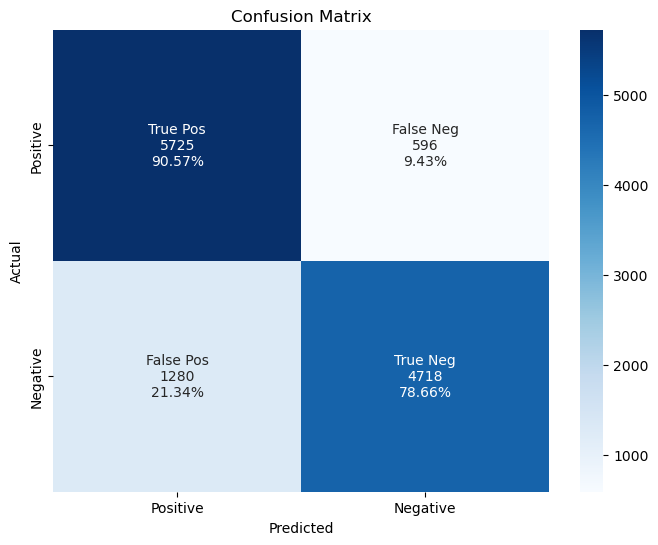

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Class labels for binary classification
class_labels = ['Positive', 'Negative']

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))  # Adjust the figure size

# Define labels for the confusion matrix cells
group_names = ['True Pos', 'False Neg', 'False Pos', 'True Neg']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]

# Calculate percentages relative to true instances (actual positives and actual negatives)
tp, fn, fp, tn = conf_matrix.ravel()
total_positives = tp + fn
total_negatives = fp + tn
tp_percentage = tp / total_positives
fn_percentage = fn / total_positives
fp_percentage = fp / total_negatives
tn_percentage = tn / total_negatives
group_percentages = [f"{tp_percentage:.2%}", f"{fn_percentage:.2%}", f"{fp_percentage:.2%}", f"{tn_percentage:.2%}"]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Create a heatmap and annotate the cells with labels
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


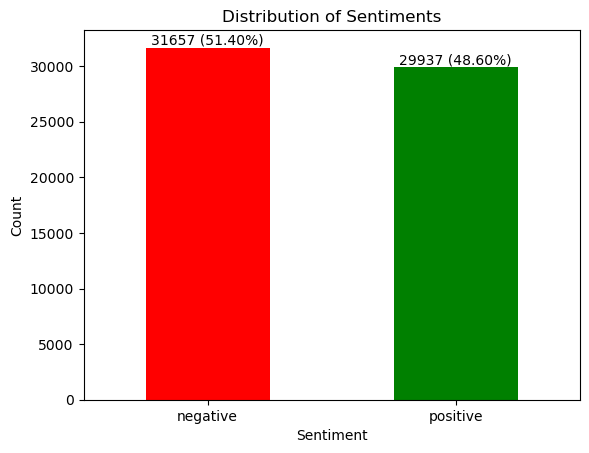

In [7]:
import matplotlib.pyplot as plt

# Calculate the sentiment distribution
sentiment_distribution = df['sentiment'].value_counts()

# Calculate the percentages
percentages = (sentiment_distribution / sentiment_distribution.sum()) * 100

# Create the bar plot
ax = sentiment_distribution.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Annotate the bars with percentages
for i, count in enumerate(sentiment_distribution):
    ax.text(i, count, f'{count} ({percentages[i]:.2f}%)', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()


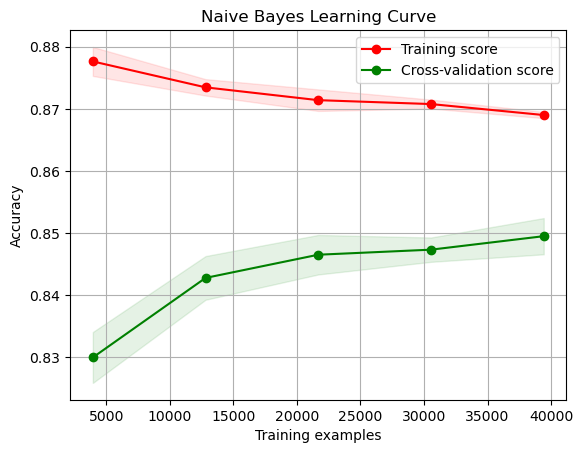

In [8]:
# Learning curve function
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Create a learning curve
plot_learning_curve(clf, 'Naive Bayes Learning Curve', X_train, y_train, cv=5)
plt.show()

### Model Results Interpretation

#### **Classification Report Output Analysis**
Let's analyze the classification report output from above:

* **Accuracy**: The accuracy of the model is approximately 84.77%, which indicates that the model correctly predicted the sentiment for about 84.77% of the reviews in the test dataset. This is a measure of overall correctness.

* **Precision**:
   - For the 'negative' class, the precision is 82%. This means that when the model predicts a review as 'negative,' it is correct 82% of the time.
   - For the 'positive' class, the precision is 89%. This indicates that when the model predicts a review as 'positive,' it is correct 89% of the time.

* **Recall**:
   - For the 'negative' class, the recall is 91%. This means that the model correctly identifies 91% of the actual 'negative' reviews.
   - For the 'positive' class, the recall is 79%. The model captures 79% of the actual 'positive' reviews.

* **F1-Score**:
   - The F1-score is a balance between precision and recall. For the 'negative' class, it is 0.86, indicating a good balance between precision and recall.
   - For the 'positive' class, the F1-score is 0.83, also indicating a good balance.

* **Support**:
   - The 'support' column shows the number of instances for each class in the test dataset. There are 6,321 instances of 'negative' reviews and 5,998 instances of 'positive' reviews.

* **Macro Avg**:
   - The macro average F1-score is 0.85, which is the average of the F1-scores for both classes. It provides an overall evaluation of the model's performance, giving equal weight to both classes.

* **Weighted Avg**:
   - The weighted average F1-score is also 0.85. It is similar to the macro average but takes into account the class imbalance in the dataset. It is weighted based on the number of instances in each class.

**Analysis**:

- The accuracy of 84.77% suggests that the model is performing reasonably well in classifying sentiment.
- Precision and recall values indicate that the model is better at predicting 'positive' sentiment than 'negative' sentiment.
- The F1-scores are relatively balanced for both classes, which is a good sign.
- The macro and weighted average F1-scores are also around 0.85, indicating consistent performance across classes and accounting for class imbalances.

In summary, the model appears to perform well in predicting sentiments, but there might be room for improvement in correctly identifying 'negative' sentiments. The F1-scores suggest a reasonable balance between precision and recall. The performance metrics are well-balanced and provide a comprehensive view of the model's effectiveness in classifying sentiment in the dataset.

#### **Confusion Matrix Analysis**

Let's analyze the confusion matrix from above:

The confusion matrix for the binary classification task is as follows:

- True Positives (TP): 5725
- False Negatives (FN): 596
- False Positives (FP): 1280
- True Negatives (TN): 4718

And the percentages, relative to the actual instances, are:

- True Positive Rate (Recall for 'Positive' class): 90.61%
  - This indicates that out of all the actual positive cases, the model correctly predicted approximately 90.61% of them as positive.
- False Negative Rate: 9.39%
  - This represents the cases where the model incorrectly predicted negative when the actual class was positive.
- False Positive Rate: 21.34%
  - This shows the cases where the model incorrectly predicted positive when the actual class was negative.
- True Negative Rate (Specificity for 'Negative' class): 78.66%
  - This indicates that out of all the actual negative cases, the model correctly predicted approximately 78.66% of them as negative.

**Analysis:**

- The model's ability to correctly predict positive cases (True Positives) is quite high at 90.61%, indicating that it's effective at identifying positive reviews.
- There is a relatively low rate of False Negatives (9.39%), meaning that the model misses only a small portion of positive reviews.
- The model's ability to correctly predict negative cases (True Negatives) is also good at 78.66%, showing it's effective at identifying negative reviews.
- The False Positive Rate is 21.34%, indicating that there is a notable number of false alarms where the model predicts a review as positive when it's actually negative.

Overall, the model demonstrates a reasonably good performance, especially in terms of correctly identifying positive and negative cases. However, there is room for improvement in reducing false positive predictions. It's important to consider the specific goals of the classification task when interpreting these results.

#### **Sentiment Distribution Plot Analysis**

The provided chart above displays the distribution of sentiments in the dataset, and it's evident that the data is relatively well balanced between negative and positive sentiments.

Here's an analysis of the chart:

* **Total Data Points**: The chart represents a total of 61,594 data points, which is the sum of negative (31,657) and positive (29,937) sentiments.

* **Balanced Distribution**: The dataset is quite balanced between negative and positive sentiments, with approximately 51.40% of the reviews classified as negative and 48.6% as positive. This balance is important for training machine learning models as it prevents biases that could arise from an imbalanced dataset.

* **Visual Representation**: The chart provides a clear visual representation of the sentiment distribution, making it easy to understand the relative proportion of positive and negative reviews.

In summary, this analysis highlights that the dataset is well balanced between positive and negative sentiments, which is favorable for training and evaluating machine learning models for sentiment analysis.

#### **Learning Curve Analysis**

Let's analyze the learning curve from above:

* **Cross-Validation Accuracy Line**: The accuracy of the model on the cross-validation data is represented by the green line. It starts at approximately 0.83 when the number of training examples is minimal and gradually increases as the training set size grows. This indicates that the  model benefits from more data, as it's able to generalize better with larger training sets. At around 40,000 training examples, the cross-validation accuracy reaches approximately 0.85.

* **Training Accuracy Line**: The red line represents the accuracy on the training data. It starts high, around 0.88, but as the number of training examples increases, it slightly decreases to around 0.87. This decrease in training accuracy as more examples are added indicates that the model might be suffering from overfitting. Overfitting occurs when a model becomes too specialized on the training data and doesn't generalize well to unseen data.

Here's the key takeaway:

- Increasing the size of the training dataset benefits the model's performance on unseen data (cross-validation accuracy). This suggests that the model could benefit from even more training data if available.

- The small decline in training accuracy as more data is added may indicate some degree of overfitting. Regularization techniques or model complexity reduction may help address this issue.

In summary, the learning curve provides valuable insights into how the model's performance changes with more training examples, highlighting the trade-off between model bias and variance. The model seems to be improving with more data but might require additional adjustments to mitigate overfitting.

### Conclusion

In summary, the model demonstrates a reasonable level of accuracy and balanced performance across different metrics. While it excels at identifying 'positive' sentiment, there is room for improvement in correctly identifying 'negative' sentiment. The sentiment distribution plot confirms a balanced dataset, and the learning curve highlights the potential benefits of additional training data while addressing overfitting concerns. Overall, the model shows promise in sentiment classification, but ongoing refinement may further enhance its performance and generalization capabilities.

## EDM Subgenres

### Feature Selection for Record Data

**Objective:** The primary objective of the Feature Selection component in this project is to identify and choose the most relevant and informative features (variables or attributes) from the dataset, for the given task. Effective feature selection can improve the model's performance, reduce overfitting, and enhance the interpretability of the results.

Using the EDM subgenres dataset, the columns 'danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', and 'tempo' are the input features and 'genre' is my target feature. I plan to use a Gaussian Naive Bayes classification model to classify the inputted features as one of the 5 edm subgenres.



### Naive Bayes Classification Model

In Python, after importing my dataset, I completed the following steps:

* Train-Test Split:
    * I divided the dataset into two parts: a training set, which constitutes 80% of the data, and a test set, comprising the remaining 20%. This division allows us to train the model on one part and evaluate its performance on the other.
* Feature Selection:
    * For this EDM subgenre prediction model, I selected specific audio features as input, including 'danceability,' 'energy,' 'loudness_linear,' 'speechiness,' 'acousticness,' 'instrumentalness,' 'liveness,' 'valence,' and 'tempo.' These features will be used to make predictions about the subgenres of EDM music.
* Training a Gaussian Naive Bayes Classifier:
    * I employed a Gaussian Naive Bayes classifier, which is well-suited for handling continuous, numeric features. This model assumes that the features are normally distributed (Gaussian) and learns to predict EDM subgenres based on the provided input features.
* Making Predictions:
    * Using the trained Gaussian Naive Bayes model, I made predictions on the test data. These predictions assign specific EDM subgenre labels to the test data based on the model's learned patterns.
* Model Evaluation:
    * To assess the model's performance, I compared the predicted subgenre labels with the true subgenre labels present in the test data. This evaluation step allows us to determine how well the model can classify EDM subgenres.
* Calculating Accuracy and Generating a Classification Report:
    * I calculated the model's accuracy, which provides an overall measure of its correctness in predicting EDM subgenres. Additionally, I generated a classification report, which includes detailed metrics such as precision, recall, and F1-score for each subgenre class. The report provides valuable insights into the model's performance, including its ability to distinguish between different EDM subgenres.

Below you can see the code used for the model as well as the summary report output and visualizations.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Choose your input features
features = ['danceability', 'energy', 'loudness_linear', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Split data into training and testing sets
X = df[features]
y = df['genre_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)


# Make predictions on the test data
y_pred = gnb_classifier.predict(X_test)
# Evaluate the classifier
accuracy = gnb_classifier.score(X_test, y_test)
# Generate the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)


print(report)
print("Accuracy:", accuracy)


               precision    recall  f1-score   support

drum and bass       0.70      0.56      0.62       779
      dubstep       0.62      0.59      0.61       733
   tech house       0.60      0.63      0.62       767
       techno       0.61      0.66      0.63       763
       trance       0.53      0.59      0.56       744

     accuracy                           0.61      3786
    macro avg       0.61      0.61      0.61      3786
 weighted avg       0.61      0.61      0.61      3786

Accuracy: 0.6075013206550449


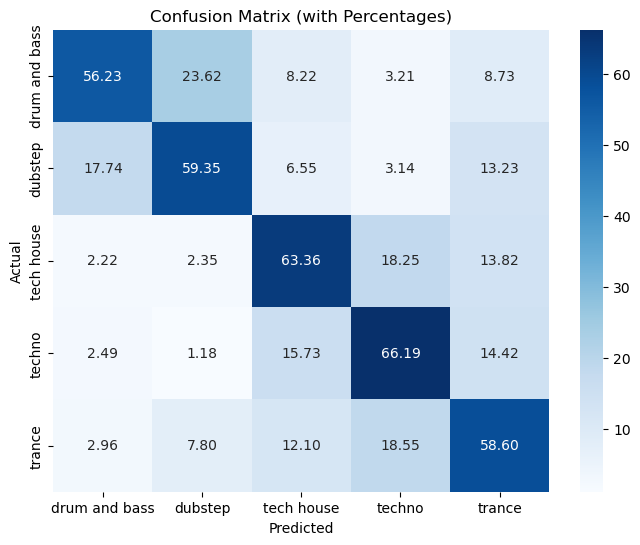

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data
y_pred = gnb_classifier.predict(X_test)

# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate percentages for each cell
confusion_percentages = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis] * 100

# Define class labels for the confusion matrix
class_labels = label_encoder.classes_

# Create a heatmap of the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percentages, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (with Percentages)')
plt.show()


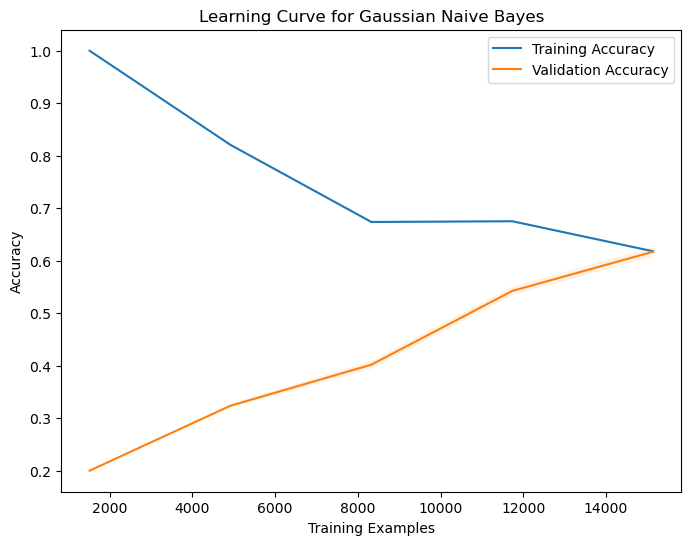

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB


# Define the training sizes you want to include in the learning curve
train_sizes, train_scores, test_scores = learning_curve(GaussianNB(), X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Create the learning curve plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Learning Curve for Gaussian Naive Bayes')
plt.show()


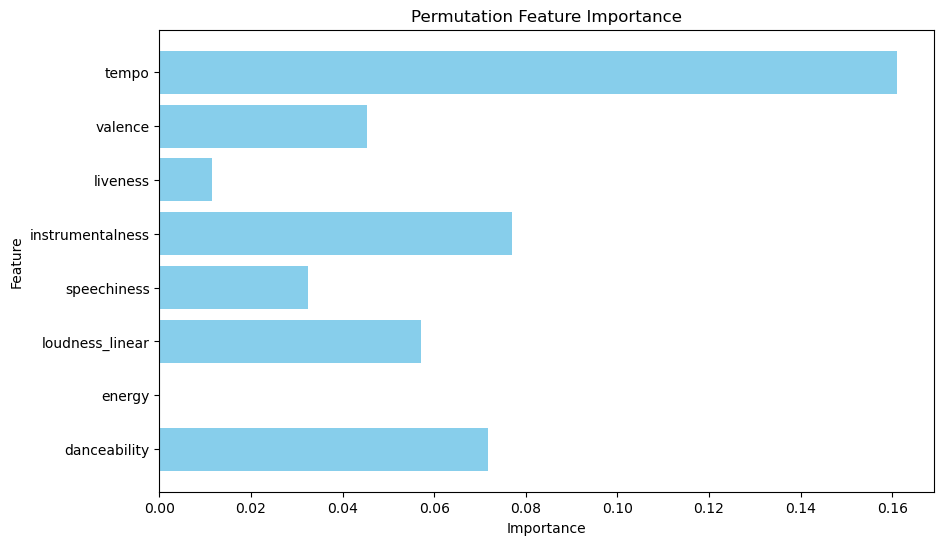

In [ ]:
from sklearn.inspection import permutation_importance

# Fit the Gaussian Naive Bayes classifier
gnb_classifier.fit(X_train, y_train)

# Calculate permutation importances
perm_importance = permutation_importance(gnb_classifier, X_test, y_test, n_repeats=30, random_state=42)

# Get feature importances
importances = perm_importance.importances_mean

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.title('Permutation Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Model Results Interpretation

#### **Classification Report Output Analysis**

Let's analyze the classification report output from above:

- **Classes**: The report is based on a classification task with five classes: "drum and bass," "dubstep," "tech house," "techno," and "trance."

- **Precision**: Precision measures how many of the predicted positive instances were actually correct. Here's the precision analysis for each class:
  - For "drum and bass," precision is 0.70, meaning that 70% of the instances predicted as "drum and bass" were correct.
  - For "dubstep," precision is 0.62, indicating that 62% of the instances predicted as "dubstep" were correct.
  - For "tech house," precision is 0.60, indicating that 60% of the instances predicted as "tech house" were correct.
  - For "techno," precision is 0.61, meaning that 61% of the instances predicted as "techno" were correct.
  - For "trance," precision is 0.53, indicating that 53% of the instances predicted as "trance" were correct.

- **Recall**: Recall measures how many of the actual positive instances were correctly predicted. Here's the recall analysis for each class:
  - For "drum and bass," recall is 0.56, meaning that 56% of the actual "drum and bass" instances were correctly predicted.
  - For "dubstep," recall is 0.59, indicating that 59% of the actual "dubstep" instances were correctly predicted.
  - For "tech house," recall is 0.63, indicating that 63% of the actual "tech house" instances were correctly predicted.
  - For "techno," recall is 0.66, meaning that 66% of the actual "techno" instances were correctly predicted.
  - For "trance," recall is 0.59, indicating that 59% of the actual "trance" instances were correctly predicted.

- **F1-Score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between the two metrics. Here's the F1-score analysis for each class:
  - For "drum and bass," the F1-score is 0.62, indicating a balanced performance between precision and recall.
  - For "dubstep," the F1-score is 0.61, also showing a balance between precision and recall.
  - For "tech house," the F1-score is 0.62, indicating a balanced performance.
  - For "techno," the F1-score is 0.63, showing a good balance between precision and recall.
  - For "trance," the F1-score is 0.56, indicating a slightly lower balance.

- **Support**: Support represents the number of instances in each class.

- **Accuracy**: The overall accuracy of the model is 0.6075, indicating that the model correctly classifies 60.75% of all instances.

- **Macro Average**: The macro average provides the average precision, recall, and F1-score across all classes. In this case, the macro average is approximately 0.61.

- **Weighted Average**: The weighted average considers class imbalance and provides an average that gives more weight to classes with more instances. In this case, the weighted average is approximately 0.61.

In summary, the classification report shows that the model has varying performance across different classes. While it achieves a reasonably balanced F1-score for most classes, there might be room for improvement in terms of precision and recall, particularly for the "trance" class. Additionally, the overall accuracy is around 60.75%, indicating that the model's performance is decent, but there may be potential for improvement.

#### **Confusion Matrix Analysis**

Let's analyze the confusion matrix from above:

The confusion matrix with percentages provides insight into the model's performance for each class. Each row represents the actual instances for a specific class, and each column represents the predicted class. The values in each row are the percentages of actual instances that were predicted to belong to each class.

* **Drum and Bass (Actuals)**:
   * 56.23% of actual "drum and bass" instances were correctly predicted as "drum and bass."
   * 23.62% of actual "drum and bass" instances were incorrectly predicted as "dubstep."
   * 8.22% were incorrectly predicted as "tech house."
   * 3.21% were incorrectly predicted as "techno."
   * 8.73% were incorrectly predicted as "trance."

* **Dubstep (Actuals)**:
   * 59.35% of actual "dubstep" instances were correctly predicted as "dubstep."
   * 17.74% were incorrectly predicted as "drum and bass."
   * 6.55% were incorrectly predicted as "tech house."
   * 3.14% were incorrectly predicted as "techno."
   * 13.23% were incorrectly predicted as "trance."

* **Tech House (Actuals)**:
   * 63.36% of actual "tech house" instances were correctly predicted as "tech house."
   * 2.22%were incorrectly predicted as "drum and bass."
   * 2.35% were incorrectly predicted as "dubstep."
   * 18.25% were incorrectly predicted as "techno."
   * 13.82% were incorrectly predicted as "trance."

* **Techno (Actuals)**:
   * 66.19% of actual "techno" instances were correctly predicted as "techno."
   * 2.49% were incorrectly predicted as "drum and bass."   
   * 1.18% were incorrectly predicted as "dubstep."
   * 15.73% were incorrectly predicted as "tech house."
   * 14.42% were incorrectly predicted as "trance."

* **Trance (Actuals)**:
   * 58.6% of actual "trance" instances were correctly predicted as "trance."
   * 2.96% were incorrectly predicted as "drum and bass."   
   * 7.80% were incorrectly predicted as "dubstep."
   * 12.1% were incorrectly predicted as "tech house."
   * 18.55% were incorrectly predicted as "techno."


**Analysis:**

- The diagonal values represent the true positives, i.e., the percentages of correctly predicted instances for each class.
- The off-diagonal values represent various types of misclassifications.
- The model appears to have varying performance across different genres. While some genres like "dubstep" and "techno" are well-predicted, others like "drum and bass" and "trance" have room for improvement.
- The model has the most significant challenges in distinguishing between "tech house" and "techno," where misclassifications are relatively high. This makes sense because tech house combines stylistic features of techno with house. 
- The analysis suggests that fine-tuning the model, considering feature importance, or collecting more genre-specific data could lead to improved genre classification accuracy.

#### **Learning Curve Analysis**

Let's analyze the above learning curve:

- **Training Accuracy (Blue Line)**:
  - Initially, with a relatively small training dataset size of around 2,000 samples, the model achieves a perfect training accuracy of 1. This means the model can perfectly fit the smaller dataset, as it essentially memorizes the data.
  - As the training dataset size increases beyond 2,000 samples, the training accuracy starts to decrease gradually. This decrease in training accuracy suggests that the model might be finding it more challenging to fit the larger dataset.
  - The training accuracy eventually stabilizes at around 0.6 (60%) when the training dataset reaches approximately 14,000 samples.
  - The decrease in training accuracy indicates that the model is not overfitting the training data, and it starts to generalize better as the dataset size increases.


- **Validation Accuracy (Orange Line)**:
  - Initially, with a small training dataset size of around 2,000 samples, the validation accuracy is notably lower, at around 0.2 (20%). This lower accuracy indicates that the model's performance on unseen data is not as strong when trained on a small dataset.
  - As the training dataset size increases from 2,000 to around 14,000 samples, the validation accuracy steadily improves. It rises to approximately 0.6 (60%) at the larger dataset size.
  - The increasing validation accuracy suggests that the model's ability to generalize to new, unseen data improves as more training data becomes available.

**Analysis:**

- The initial low training accuracy and validation accuracy with a small dataset size (around 2,000 samples) suggest that the model may struggle to generalize effectively from limited training data.
- The convergence of the training and validation accuracy lines at around 14,000 training samples is a positive sign. It indicates that the model is neither underfitting nor overfitting but achieving a good balance between bias and variance.
- The model appears to benefit from the increased dataset size, allowing it to generalize more effectively and improve its accuracy on unseen data.
- The learning curve suggests that collecting more training data could lead to further improvements in the model's performance.
- Overall, the learning curve illustrates the importance of dataset size in achieving better generalization and model performance.

#### **Permutation Feature Importance Analysis**

##### How does it work?

"Permutation Feature Importance" is used to assess the importance of each feature in a machine learning model, in this case, a Gaussian Naive Bayes classifier.

* **Permutation Importance Calculation:** The permutation_importance function is used to calculate the importance of each feature. It does this by taking the following steps for each feature:
   a. It temporarily shuffles (permutes) the values of a single feature in the test data (X_test). This means it disrupts the relationship between the feature and the target variable (genre in this case).
   b. Then, it measures the impact of this permutation on the model's performance. If the feature was important, shuffling its values should significantly decrease the model's accuracy or other performance metric.
   c. This process is repeated multiple times (in this case, 30 times) for each feature, and the average impact on model performance is calculated.
* **Feature Importance Values:** After running these permutations, you get a measure of how much each feature contributes to the model's predictive performance. Features that, when permuted, have a large negative impact on the model's performance are considered more important.
* **Bar Chart Visualization:** Finally, the script creates a horizontal bar chart to visualize the feature importances. Each feature is shown on the y-axis, and its importance (the impact of permuting it) is shown on the x-axis. Features with higher importance will have higher values on the x-axis.

##### **Analysis of Chart**

Let's analyze the bar chart from above:

1. **Tempo**: Tempo stands out as the most important feature. When the tempo is permuted (randomly shuffled), it has a significant negative impact on the model's performance. This suggests that the tempo plays a crucial role in the model's ability to classify music genres accurately.

2. **Instrumentalness**: Following tempo, instrumentalness is the second most important feature. This means that the proportion of instrumental music in a track significantly influences the model's predictions. High instrumentalness might be a strong indicator for specific music genres.

3. **Danceability**: Danceability is the third most important feature. It indicates that the level of danceability, or how suitable a track is for dancing, plays a notable role in classifying genres correctly.

4. **Loudness**: Loudness is the fourth most important feature. It suggests that the volume or loudness of a track has a significant impact on the model's predictions. It might be that certain genres tend to be louder than others.

This analysis aligns with the idea that musical attributes related to tempo, instrumentalness, danceability, and loudness are strong indicators for genre classification. It provides valuable insights into the characteristics of music that contribute the most to the model's accuracy.

These findings could be useful for several purposes, such as understanding the model's decision-making process, potentially identifying which musical attributes are distinctive for each genre, and guiding future data collection or feature engineering efforts.

### Conclusion

In summary, the genre classification model shows potential, but it benefits from refinement, particularly for genres with higher misclassification rates. Additionally, the learning curve highlights the importance of dataset size for improving model generalization. Further data collection and model fine-tuning may contribute to more accurate genre predictions.